<a href="https://colab.research.google.com/github/prasath1196/Deep-Learning-AI-Mini-Projects/blob/main/Understanding_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tf_keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [20]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalising pixel values to 0 -> 1
x_train = x_train/255.0
x_test = x_test/255.0

In [22]:
# We are adding channels. The channel tells the neural network
#how many values are stored at each pixel location. For grayscale images,
#each pixel has 1 value (intensity). For RGB images, each pixel has 3 values
#(Red, Green, Blue) — that’s the 3 channels.”

x_train =np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


## Building Encoder

### **models.sequential means the following:**
#### **models** comes from the Keras library — it gives you tools to build, train, and run neural networks.

#### **Sequential** is one of the simplest ways to build a neural network in Keras — it says:

#### “I’m stacking layers in a straight line, like pancakes — no branches, no loops, just vibes.”

### This says, hey input is going to be of this shape
#### **layers.InputLayer(input_shape=(28,28,1))**




###  Shrinks spatial size while increasing depth; each pixel now holds a 64D feature vector capturing rich patterns

####  Conv2D(32, 3x3, stride=2, padding='same') → input (28x28x1) → output (14x14x32)
####  Conv2D(64, 3x3, stride=2, padding='same') → input (14x14x32) → output (7x7x64)

### Flatten (7x7x64) feature map into 1D vector (3136,) to feed into Dense layers


### Dense layer reduces 3136D flattened vector to 64D using ReLU — compresses feature info for encoding




In [32]:

encoder = models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                             layers.Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
                             layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2),
                             layers.Flatten(),
                             layers.Dense(64, activation='relu')])

# Conv2DTranspose expands spatial size by inserting zeros between pixels and applying learned kernels;
# acts like reverse-conv to reconstruct higher-res output from compressed feature maps

# Final Conv2D layer with sigmoid activation compresses 32 feature maps into a single (28x28x1) grayscale image;
# sigmoid ensures output pixel values are in [0, 1] to match normalized input



decoder = models.Sequential([layers.InputLayer(input_shape=(64,)),
                             layers.Dense(7*7*64,activation='relu'),
                             layers.Reshape((7,7,64)),
                             layers.Conv2DTranspose(64,(3,3), activation='relu', padding='same', strides=2),
                             layers.Conv2DTranspose(32,(3,3), activation='relu', padding='same', strides=2),
                             layers.Conv2D(1,(3,3), activation='sigmoid', padding='same')])

encoder.summary()
decoder.summary()
autoencoder = models.Sequential([encoder, decoder])

# Each pixel is treated like a Bernoulli variable — a 0 or 1 outcome;
# sigmoid gives the predicted probability for pixel=1,
# binary_crossentropy compares it to true pixel value using log loss


# Adam optimizer dynamically adjusts learning rates per weight using momentum and squared gradient history;
# leads to faster and more stable convergence than vanilla gradient descent

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
#



Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_16 (Dense)            (None, 64)                200768    
                                                                 
Total params: 219584 (857.75 KB)
Trainable params: 219584 (857.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              P

In [34]:
autoencoder.fit(x_train, x_train, epochs=2, batch_size=128, validation_data =(x_test,x_test))

Epoch 1/2
469/469 [==============================] - 125s 262ms/step - loss: 0.1614 - val_loss: 0.0872
Epoch 2/2
469/469 [==============================] - 122s 260ms/step - loss: 0.0812 - val_loss: 0.0762


313/313 [==============================] - 6s 19ms/step


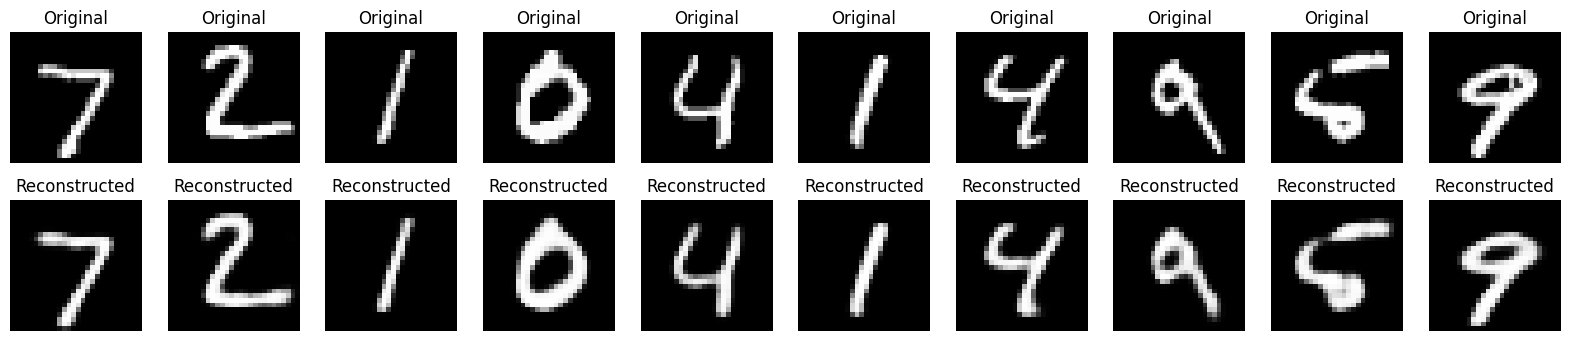

In [36]:
decoded_images = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20,4))

for i in range(n):
  ax= plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  plt.title('Original')
  plt.gray()
  ax.axis('off')

  ax= plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_images[i].reshape(28,28),cmap="gray")
  plt.title('Reconstructed')
  plt.gray()
  ax.axis('off')

plt.show()